First, we'll look at how to train a linear regression model.

In [1]:
# Let's produce a randomly generated linear dataset

import numpy as np

# Generate 100 x values from 0 to 2
X = 2 * np.random.rand(100, 1)
# Generate 100 y values around the line 4 + 3*x, with some normally distributed noise
y = 4 + 3 * X + np.random.randn(100, 1)

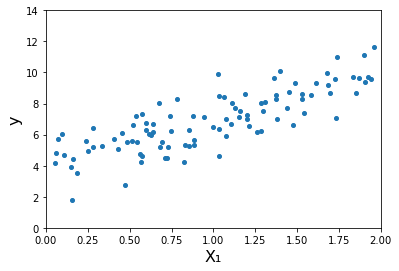

In [2]:
# Let's plot the data

import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("X\N{SUBSCRIPT ONE}", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.scatter(X, y, s=16)
plt.axis([0,2,0,14])
plt.show()

For linear regression models, we typically use an MSE(Mean Squared Error) cost function, which we want to minimize. 

There is a closed-form solution for the vector theta that does so, where y_pred = theta_0 + theta_1*x is our estimate for the line.

The formula is:

theta = (X^T*X)^(-1) * X^T * y, 

where y is the vector containing all y values in our training set, and where X = (x_1, ..., x_n) contains row vectors x_i^T = (1, x).

In [13]:
# We glue a row of ones to the top of our X matrix, before computing the cost-minimizing vector theta

X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.99507661],
       [2.97513238]])

Our model predicts the line 4 + 2.98*x, which is... shockingly close to the values we would have hoped for.

In [16]:
# Now, given the x value of a new data point, we can make a prediction for the corresponding y-value, using our model

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.99507661],
       [9.94534137]])

Our model predicts the points (0, 4) and (2, 9.95).

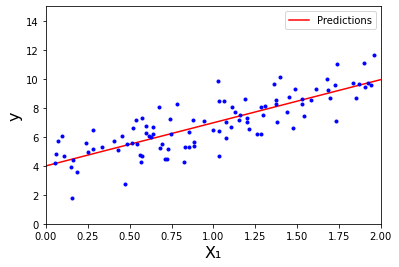

In [25]:
# We can add the model's predictions to our previous plot

pred, = plt.plot(X_new, y_predict, "r-")
pred.set_label("Predictions")
plt.legend()
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("X\N{SUBSCRIPT ONE}", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

So we now know how to train a linear regression model "manually". Performing it using Scikit-Learn is simpler:

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("\N{Greek Small Letter Theta}\N{SUBSCRIPT ZERO}, \N{Greek Small Letter Theta}\N{SUBSCRIPT ONE} =", lin_reg.intercept_, lin_reg.coef_)
print("y predictions:")
lin_reg.predict(X_new)

θ₀, θ₁ = [3.99507661] [[2.97513238]]
y predictions:


array([[3.99507661],
       [9.94534137]])

The Linear Regression class is based on the scipy.linalg.lstsq() ("least squares") function. 

lstsq(A, b) computes the vector x which minimizes the squared Euclidean distance between A*x and b and returns it, together with the sums of residuals for each column (useful for figuring out if a linear model is appropriate), the rank & "singular values" of A.

We can also call it directly if we're feeling pretty low-level:

In [42]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Model:")
print(theta_best_svd, "\n")
print("Residuals:")
print(residuals, "\n")
print("Rank:")
print(rank, "\n")
print("Singular values:")
print(s, "\n")

Model:
[[3.99507661]
 [2.97513238]] 

Residuals:
[123.38467431] 

Rank:
2 

Singular values:
[14.47779126  3.64164471] 



The function computes $\hat{\theta}=X^+y$, where $X^+$ is the *pseudoinverse* (or more precisely, the Moore-Penrose inverse) of X...

which we can also compute directly by using np.linalg.pinv() if we are feeling even more low-level:

In [47]:
np.linalg.pinv(X_b).dot(y)

array([[3.99507661],
       [2.97513238]])

Indeed, we can get EVEN DEEPER by using Singular Value Decomposition (see np.linalg.svd()) to find the pseudoinverse, but that is a topic for another day. 


Instead, we can learn how to use Batch Gradient Descent to train a linear classifier - on each step of the gradient descent, we use our entire dataset to readjust our parameters.

On each step, the gradient vector of the cost function is $$\frac{2}{m}X^T(X\theta - y)$$, consisting of $$\frac{2}{m} \sum_{i=1}^m(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}$$ w. respect to each component $\theta_j$.
The gradient vector points "up-hill" on the curve of the cost function, so we just take a step in the opposite direction.

In [65]:
# This is a quick implementation of the Batch Gradient Descent algorithm

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients # Take a step in the opposite direction of where the gradient vector points
    
theta

array([[3.99507661],
       [2.97513238]])

In [80]:
# Let's write a function that plots the predictions after each of the first 10 steps of the process for a given learning rate eta

def plot_early_descent(eta):

    plt.figure()
    plt.plot(X, y, "b.")
    plt.axis([0, 2, 0, 15])
    plt.xlabel("X\N{SUBSCRIPT ONE}", fontsize=16)
    plt.ylabel("y", fontsize=16)

    theta = np.random.randn(2,1) 
    for _ in range(10):
    
        X_new = np.array([[0], [2]])
        X_new_b = np.c_[np.ones((2, 1)), X_new]
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-", alpha=0.42)
    
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients 

    plt.show()

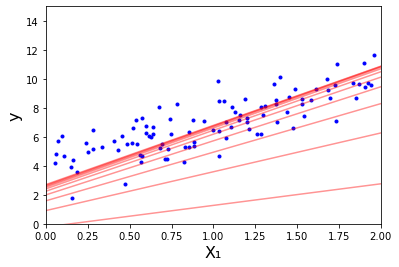

In [82]:
# With a learning rate of 0.1, our predictions should converge rapidly

plot_early_descent(0.1)

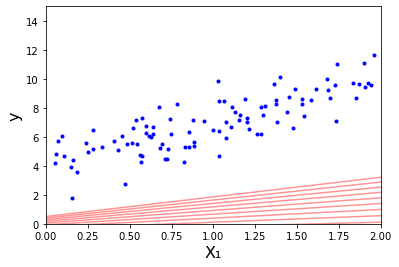

In [84]:
# But if we choose a learning rate that's too low, converging will take much longer

plot_early_descent(0.01)

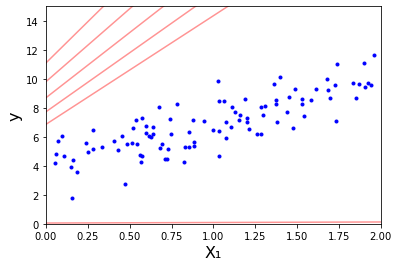

In [89]:
# If we take a learning rate that's too large on the other hand, our algorithm will jump past the optimum again and again, actually making our model continuously worse

plot_early_descent(0.5)